# Exploration Exercises

In [1]:
import pandas as pd
import numpy as np

import env
import wrangle
import wrangle2 as w

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

### Exercises
Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

### Wrangle Data

In [2]:
df = w.get_zillow_data()

In [3]:
df = w.prepare_zillow(df)

In [4]:
df.head()

propertylandusetypeid  parcelid  id  logerror transactiondate     id.1  \
0                  261.0  14297519   0  0.025595      2017-01-01  1727539   
1                  261.0  17052889   1  0.055619      2017-01-01  1387261   
2                  261.0  14186244   2  0.005383      2017-01-01    11677   
3                  261.0  12177905   3 -0.103410      2017-01-01  2288172   
6                  261.0  12095076   6 -0.001011      2017-01-01   781532   

   bathroomcnt  bedroomcnt  calculatedbathnbr  calculatedfinishedsquarefeet  \
0          3.5         4.0                3.5                        3100.0   
1          1.0         2.0                1.0                        1465.0   
2          2.0         3.0                2.0                        1243.0   
3          3.0         4.0                3.0                        2376.0   
6          3.0         4.0                3.0                        2962.0   

   ...  roomcnt  yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
0  ...      0.0     1998.0                    485713.0          1023282.0   
1  ...      5.0     1967.0                     88000.0           464000.0   
2  ...      6.0     1962.0                     85289.0           564778.0   
3  ...      0.0     1970.0                    108918.0           145143.0   
6  ...      0.0     1950.0                    276684.0           773303.0   

   assessmentyear  landtaxvaluedollarcnt taxamount  censustractandblock  \
0          2016.0               537569.0  11013.72         6.059063e+13   
1          2016.0               376000.0   5672.48         6.111001e+13   
2          2016.0               479489.0   6488.30         6.059022e+13   
3          2016.0                36225.0   1777.51         6.037300e+13   
6          2016.0               496619.0   9516.26         6.037461e+13   

         propertylandusedesc   county  
0  Single Family Residential   Orange  
1  Single Family Residential  Ventura  
2  Single Family Residential   Orange  
3  Single Family Residential       LA  
6  Single Family Residential       LA  

[5 rows x 31 columns]

In [5]:
df.dtypes

propertylandusetypeid           float64
parcelid                          int64
id                                int64
logerror                        float64
transactiondate                  object
id.1                              int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64


In [6]:
df = df.drop(columns=['id', 'id.1'])

### Split Data

In [7]:
train, validate, test = wrangle.split_data(df)

train---> (28039, 29)
validate---> (12017, 29)
test---> (10015, 29)


### Explore

In [8]:
# plot distributions
def plot_dist(df):
    
    # loop through columns and use seaborn to plot distributions
    for col in list(df):
        plt.hist(data = df, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

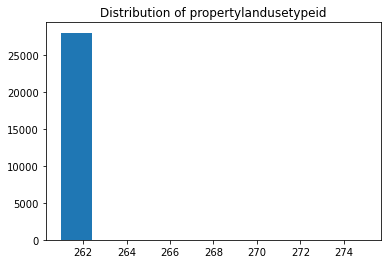

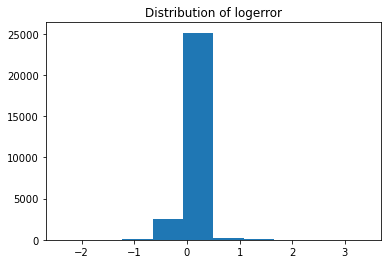

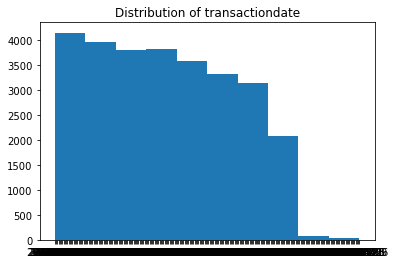

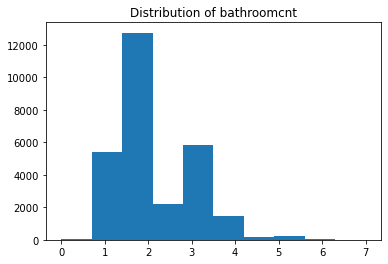

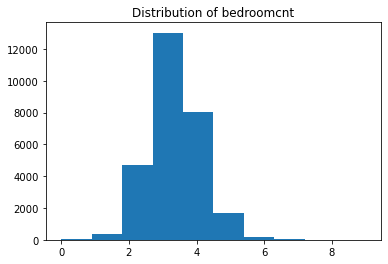

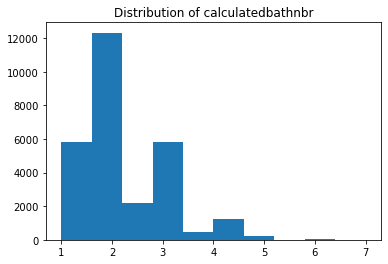

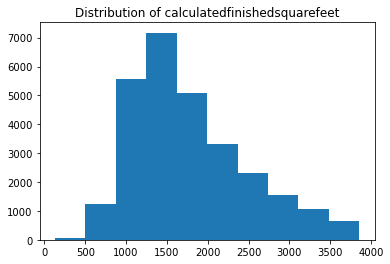

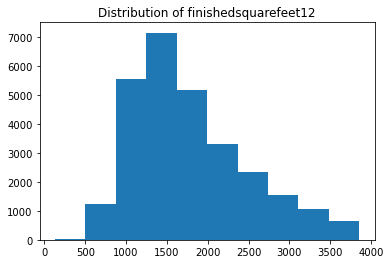

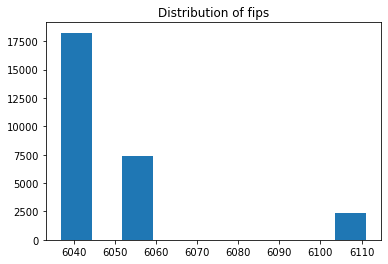

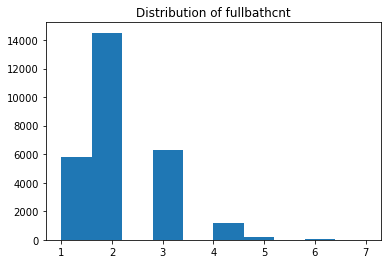

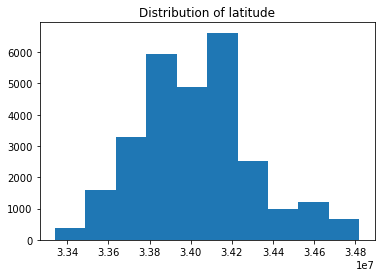

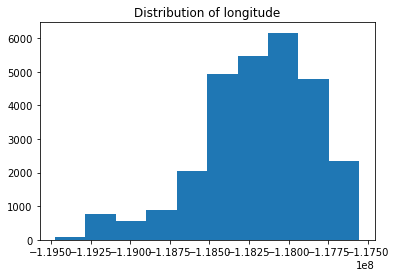

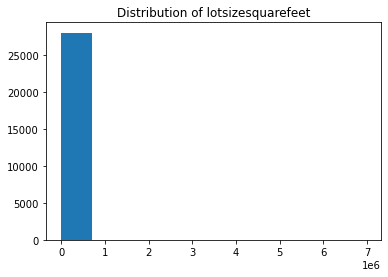

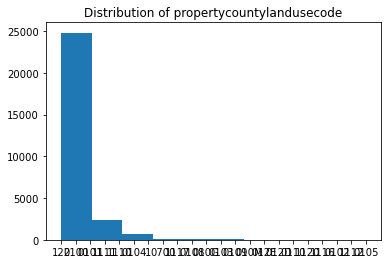

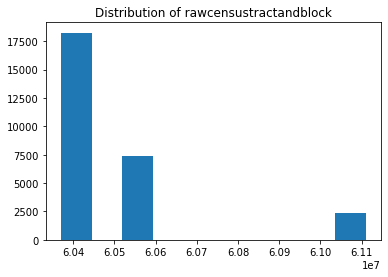

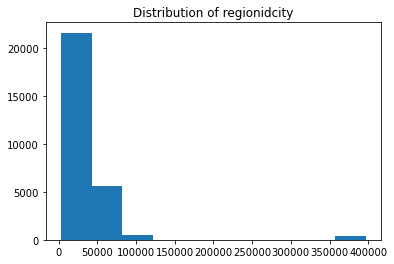

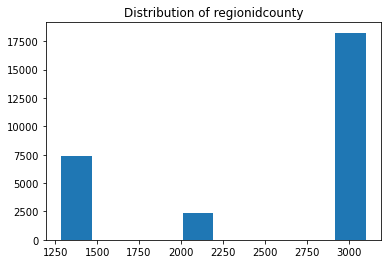

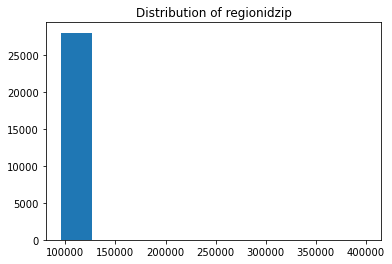

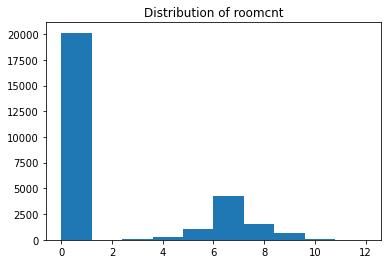

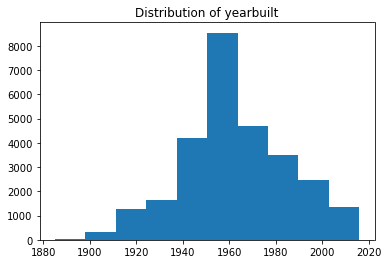

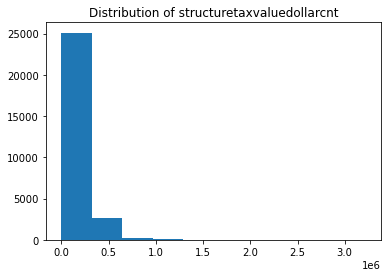

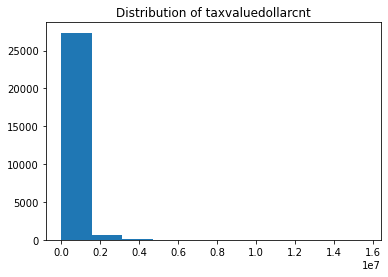

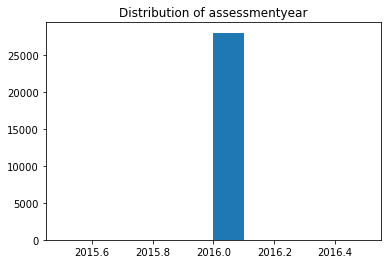

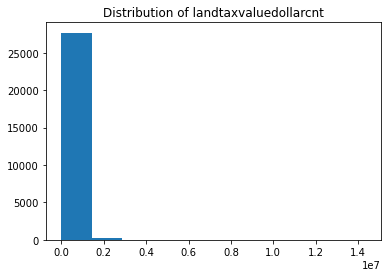

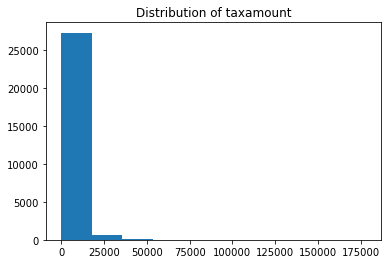

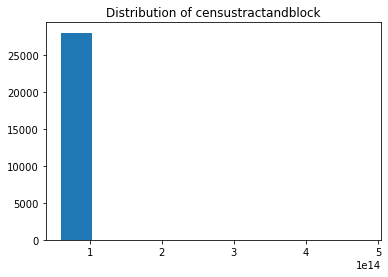

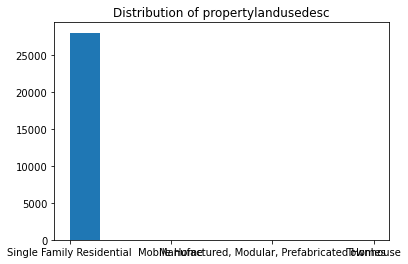

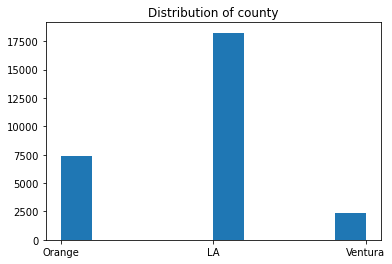

In [9]:
plot_dist(train.drop(columns = 'parcelid'))

In [10]:
def explore_univariate(df):

    for col in list(df):
        plt.figure(figsize=(16,5))
        plt.subplot(121)
        plt.boxplot(x = col, data = df)
        plt.title(f'Box Plot of {col}')

        plt.subplot(122)
        plt.hist(data = df, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

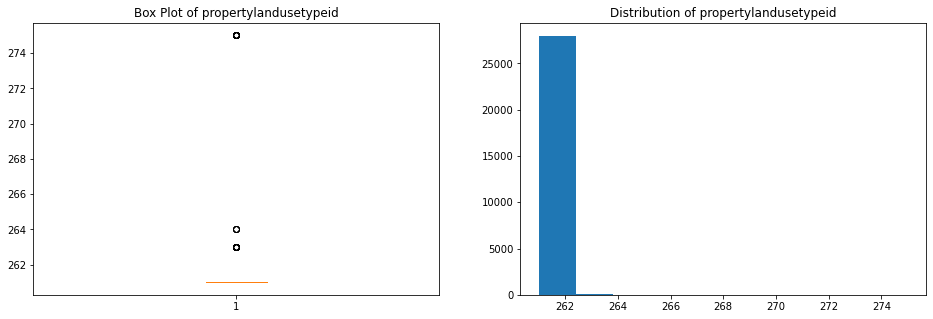

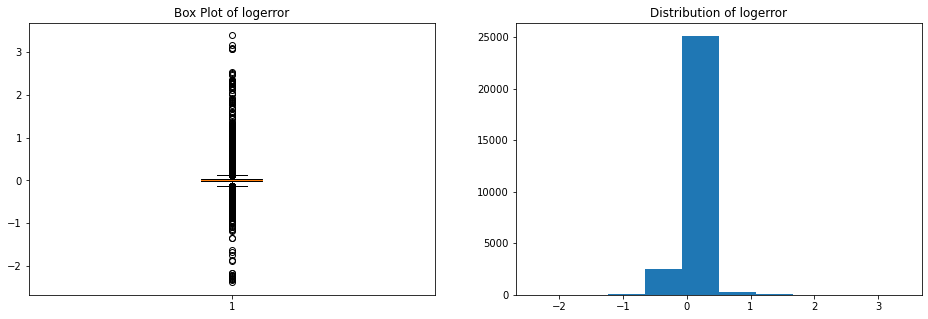

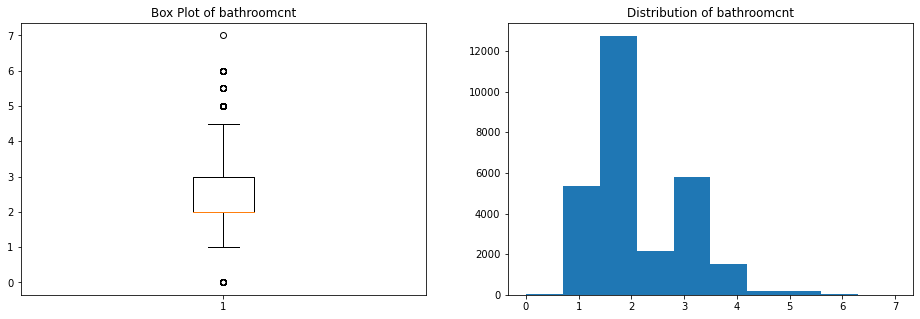

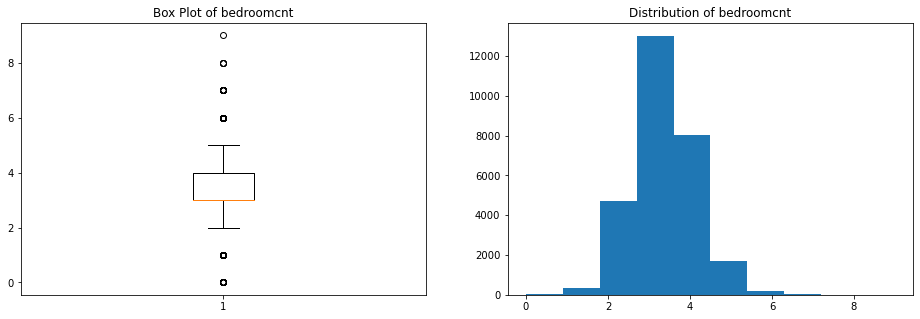

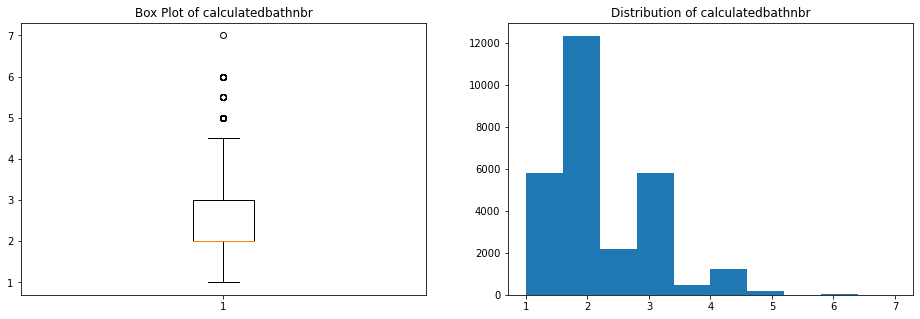

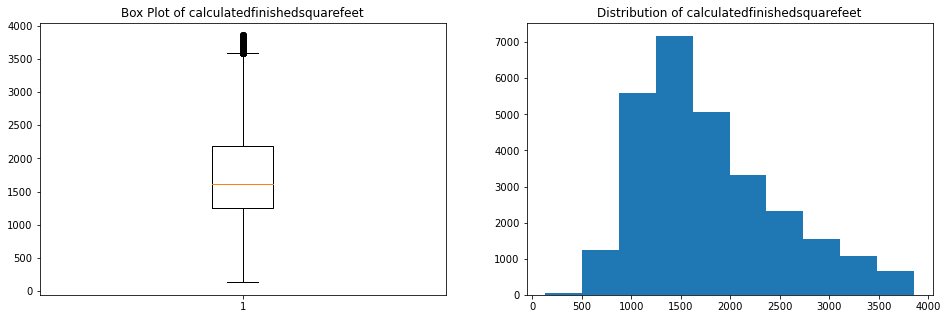

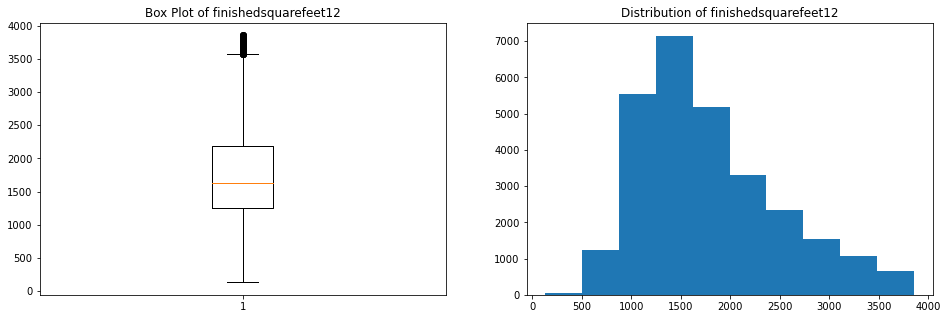

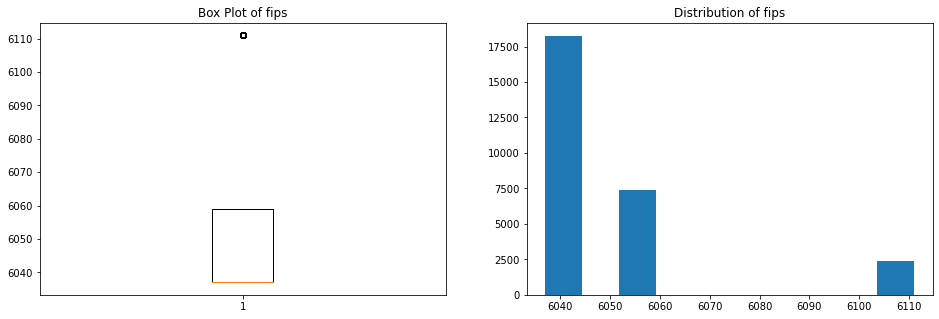

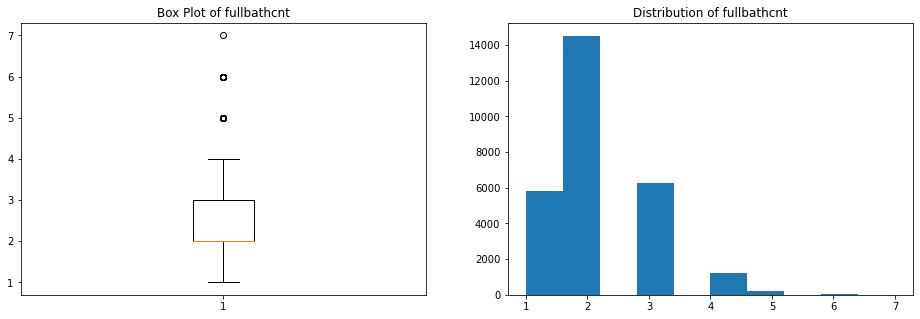

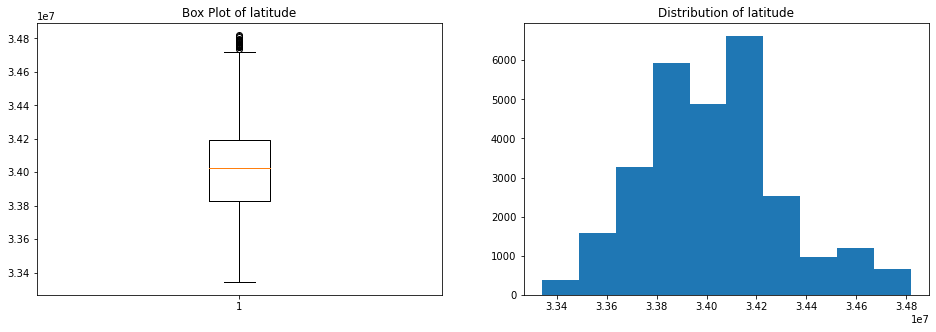

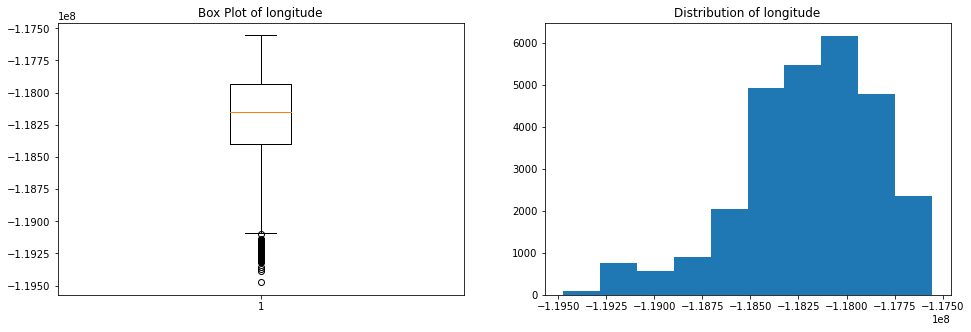

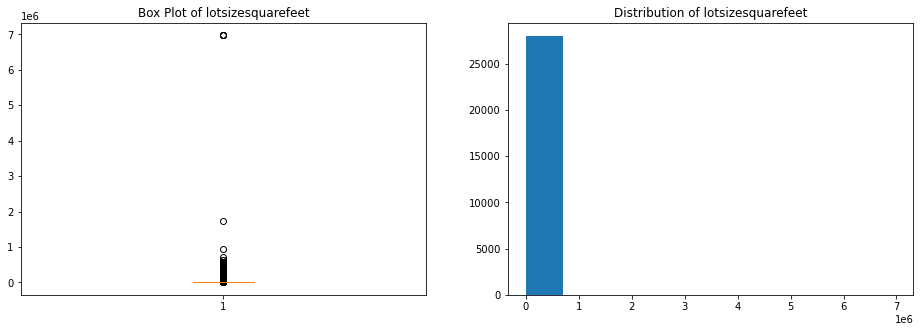

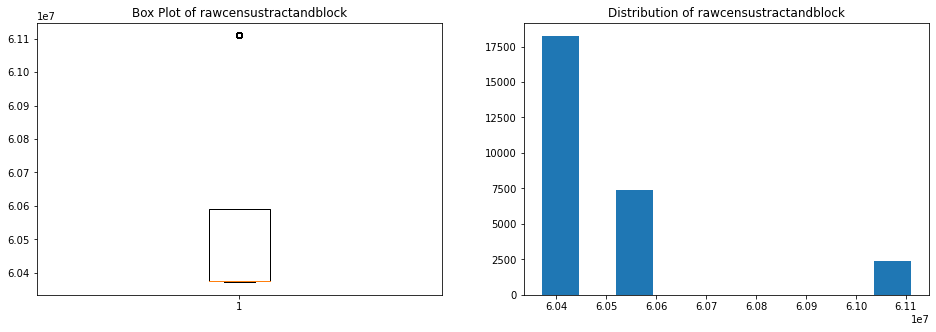

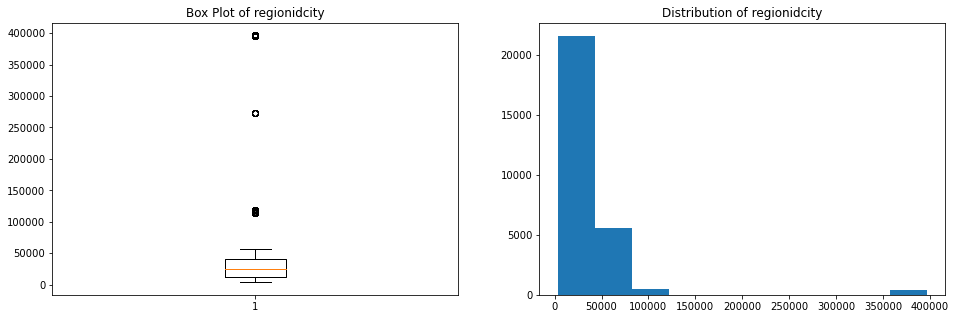

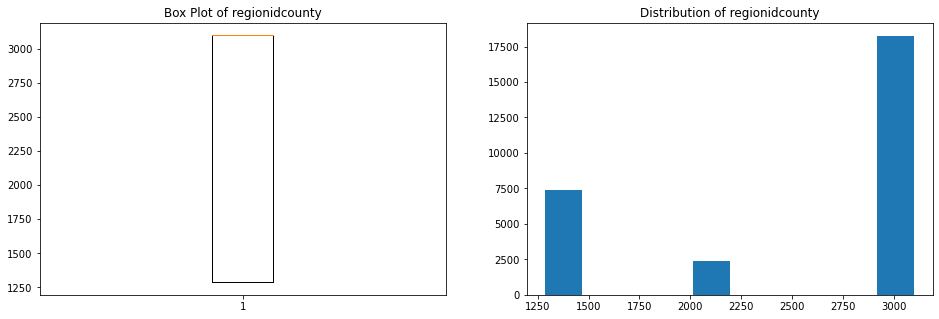

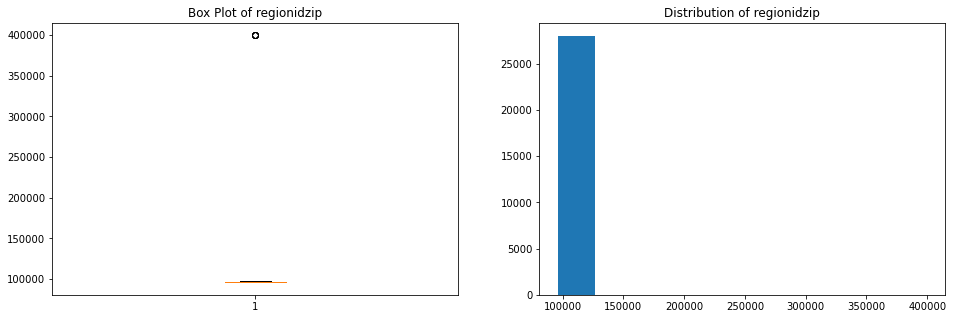

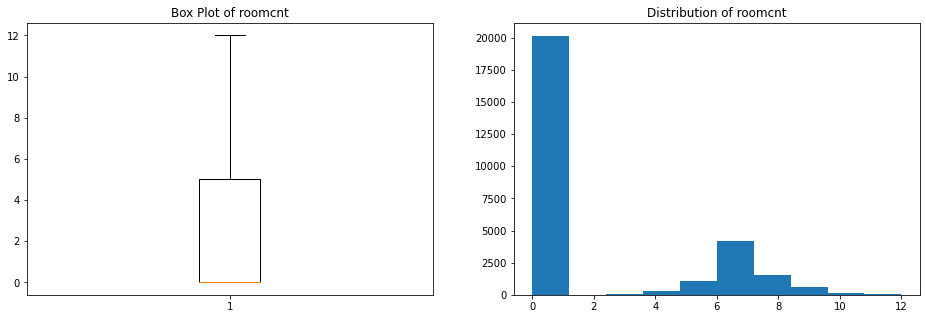

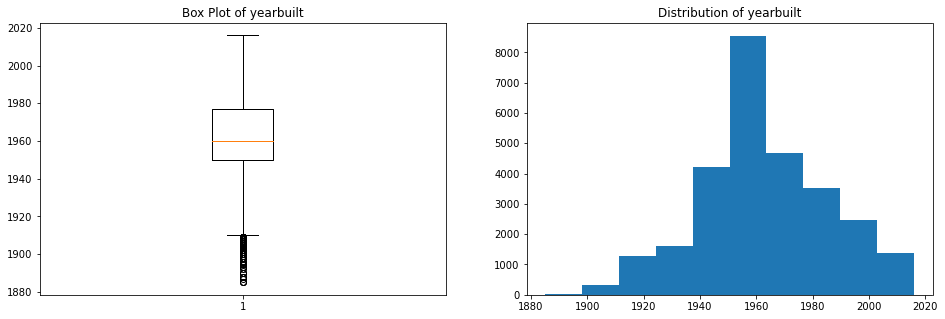

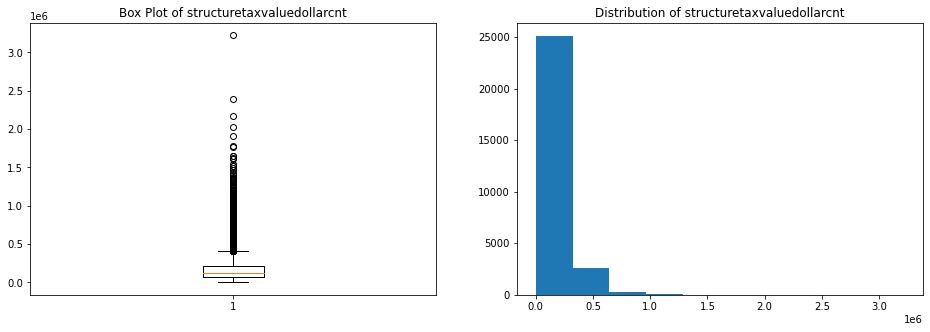

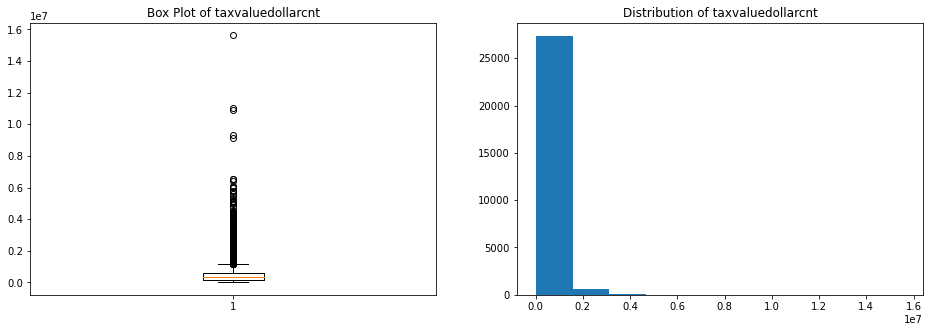

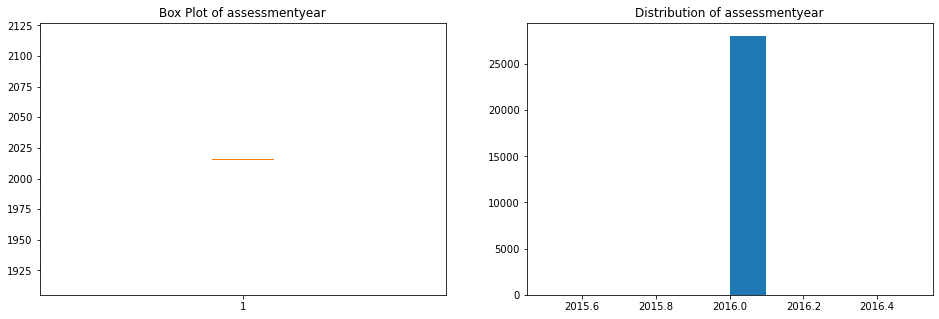

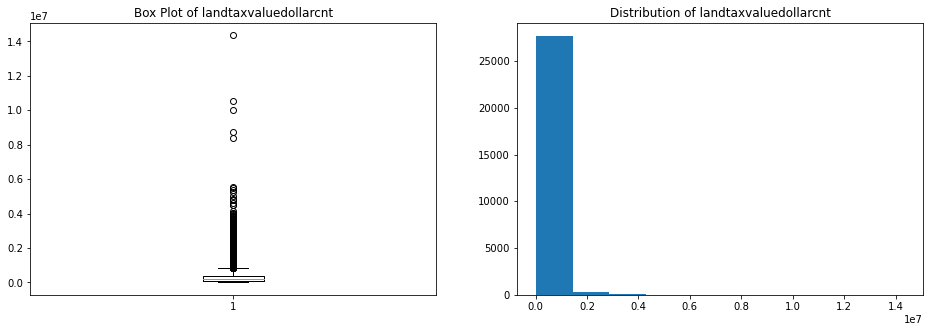

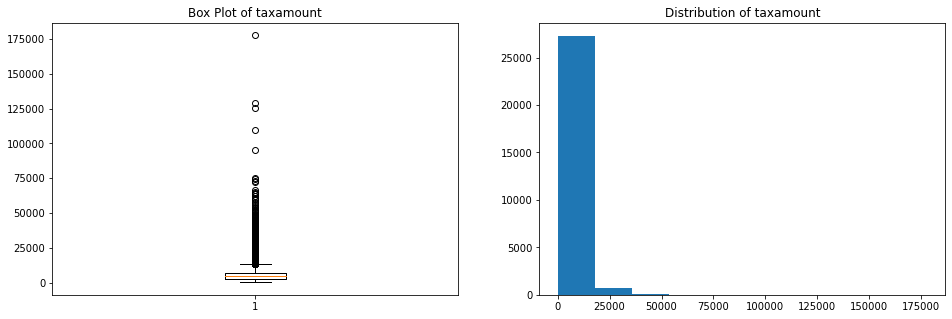

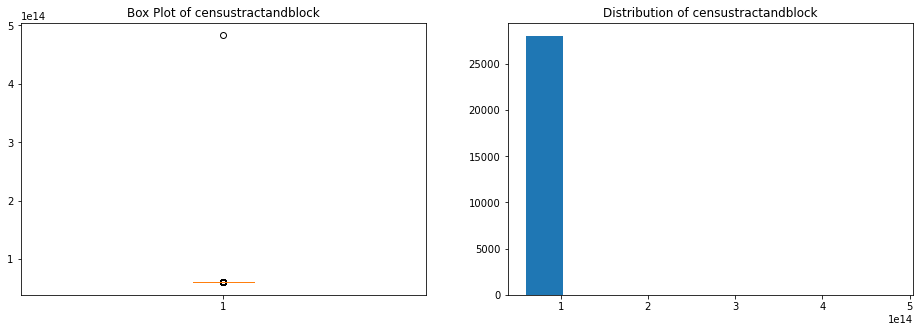

In [12]:
drop_cols = ['parcelid', 'transactiondate', 'propertycountylandusecode', 'propertylandusedesc', 'county']
explore_univariate(train.drop(columns = drop_cols))

In [13]:
# view variance in logerror between the two counties
stats.levene(train[train.county == 'LA'].logerror, train[train.county=='Orange'].logerror)

LeveneResult(statistic=33.66157809800656, pvalue=6.635378939824987e-09)

In [16]:
train.describe().T

count          mean           std  \
propertylandusetypeid         28039.0  2.610178e+02  4.642541e-01   
parcelid                      28039.0  1.298288e+07  3.123368e+06   
logerror                      28039.0  1.748786e-02  1.703494e-01   
bathroomcnt                   28039.0  2.183691e+00  8.354347e-01   
bedroomcnt                    28039.0  3.237170e+00  8.861430e-01   
calculatedbathnbr             28039.0  2.185991e+00  8.321496e-01   
calculatedfinishedsquarefeet  28039.0  1.781067e+03  7.020634e+02   
finishedsquarefeet12          28039.0  1.782712e+03  7.003171e+02   
fips                          28039.0  6.049096e+03  2.112912e+01   
fullbathcnt                   28039.0  2.127501e+00  8.170464e-01   
latitude                      28039.0  3.402513e+07  2.730456e+05   
longitude                     28039.0 -1.181965e+08  3.569363e+05   
lotsizesquarefeet             28039.0  1.040206e+04  8.618266e+04   
rawcensustractandblock        28039.0  6.049408e+07  2.096968e+05   
regionidcity                  28039.0  3.297409e+04  4.857130e+04   
regionidcounty                28039.0  2.533000e+03  7.999403e+02   
regionidzip                   28039.0  9.661937e+04  4.069267e+03   
roomcnt                       28039.0  1.897143e+00  3.114051e+00   
yearbuilt                     28039.0  1.962412e+03  2.255599e+01   
structuretaxvaluedollarcnt    28039.0  1.648932e+05  1.429525e+05   
taxvaluedollarcnt             28039.0  4.545688e+05  4.534638e+05   
assessmentyear                28039.0  2.016000e+03  0.000000e+00   
landtaxvaluedollarcnt         28039.0  2.898549e+05  3.599418e+05   
taxamount                     28039.0  5.575500e+03  5.227649e+03   
censustractandblock           28039.0  6.050883e+13  2.532059e+12   

                                       min           25%           50%  \
propertylandusetypeid         2.610000e+02  2.610000e+02  2.610000e+02   
parcelid                      1.071186e+07  1.150106e+07  1.258075e+07   
logerror                     -2.387800e+00 -2.502243e-02  6.267975e-03   
bathroomcnt                   0.000000e+00  2.000000e+00  2.000000e+00   
bedroomcnt                    0.000000e+00  3.000000e+00  3.000000e+00   
calculatedbathnbr             1.000000e+00  2.000000e+00  2.000000e+00   
calculatedfinishedsquarefeet  1.280000e+02  1.252000e+03  1.618000e+03   
finishedsquarefeet12          1.280000e+02  1.255000e+03  1.623000e+03   
fips                          6.037000e+03  6.037000e+03  6.037000e+03   
fullbathcnt                   1.000000e+00  2.000000e+00  2.000000e+00   
latitude                      3.334062e+07  3.382980e+07  3.402276e+07   
longitude                    -1.194753e+08 -1.183985e+08 -1.181535e+08   
lotsizesquarefeet             2.360000e+02  5.527500e+03  6.749000e+03   
rawcensustractandblock        6.037101e+07  6.037401e+07  6.037603e+07   
regionidcity                  3.491000e+03  1.244700e+04  2.438400e+04   
regionidcounty                1.286000e+03  1.286000e+03  3.101000e+03   
regionidzip                   9.598200e+04  9.620600e+04  9.641200e+04   
roomcnt                       0.000000e+00  0.000000e+00  0.000000e+00   
yearbuilt                     1.885000e+03  1.950000e+03  1.960000e+03   
structuretaxvaluedollarcnt    1.290000e+02  7.500000e+04  1.260000e+05   
taxvaluedollarcnt             3.254000e+03  1.856795e+05  3.588800e+05   
assessmentyear                2.016000e+03  2.016000e+03  2.016000e+03   
landtaxvaluedollarcnt         2.250000e+03  7.023600e+04  2.081560e+05   
taxamount                     5.126000e+01  2.560500e+03  4.469270e+03   
censustractandblock           6.037101e+13  6.037401e+13  6.037603e+13   

                                       75%           max  
propertylandusetypeid         2.610000e+02  2.750000e+02  
parcelid                      1.411747e+07  1.676380e+08  
logerror                      3.886322e-02  3.394544e+00  
bathroomcnt                   3.000000e+00  7.000000e+00  
bedroomcnt       

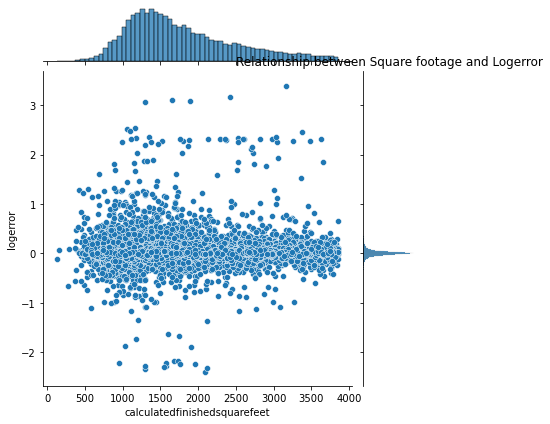

In [18]:
# visualize squarefeet versus logerror
sns.jointplot(x='calculatedfinishedsquarefeet', y='logerror', data=train)
plt.xlabel('Calculated Finished Square Feet')
plt.ylabel('Logerror')
plt.title('Relationship between Square footage and Logerror')
plt.show()

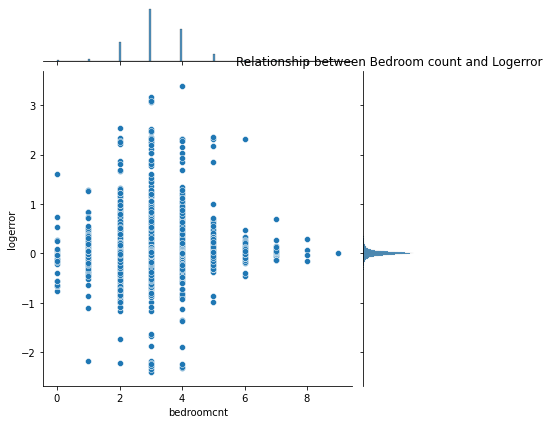

In [19]:
# visualize relationship between logerror and bedroom count
sns.jointplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom Count')
plt.ylabel('Logerror')
plt.title('Relationship between Bedroom count and Logerror')
plt.show()

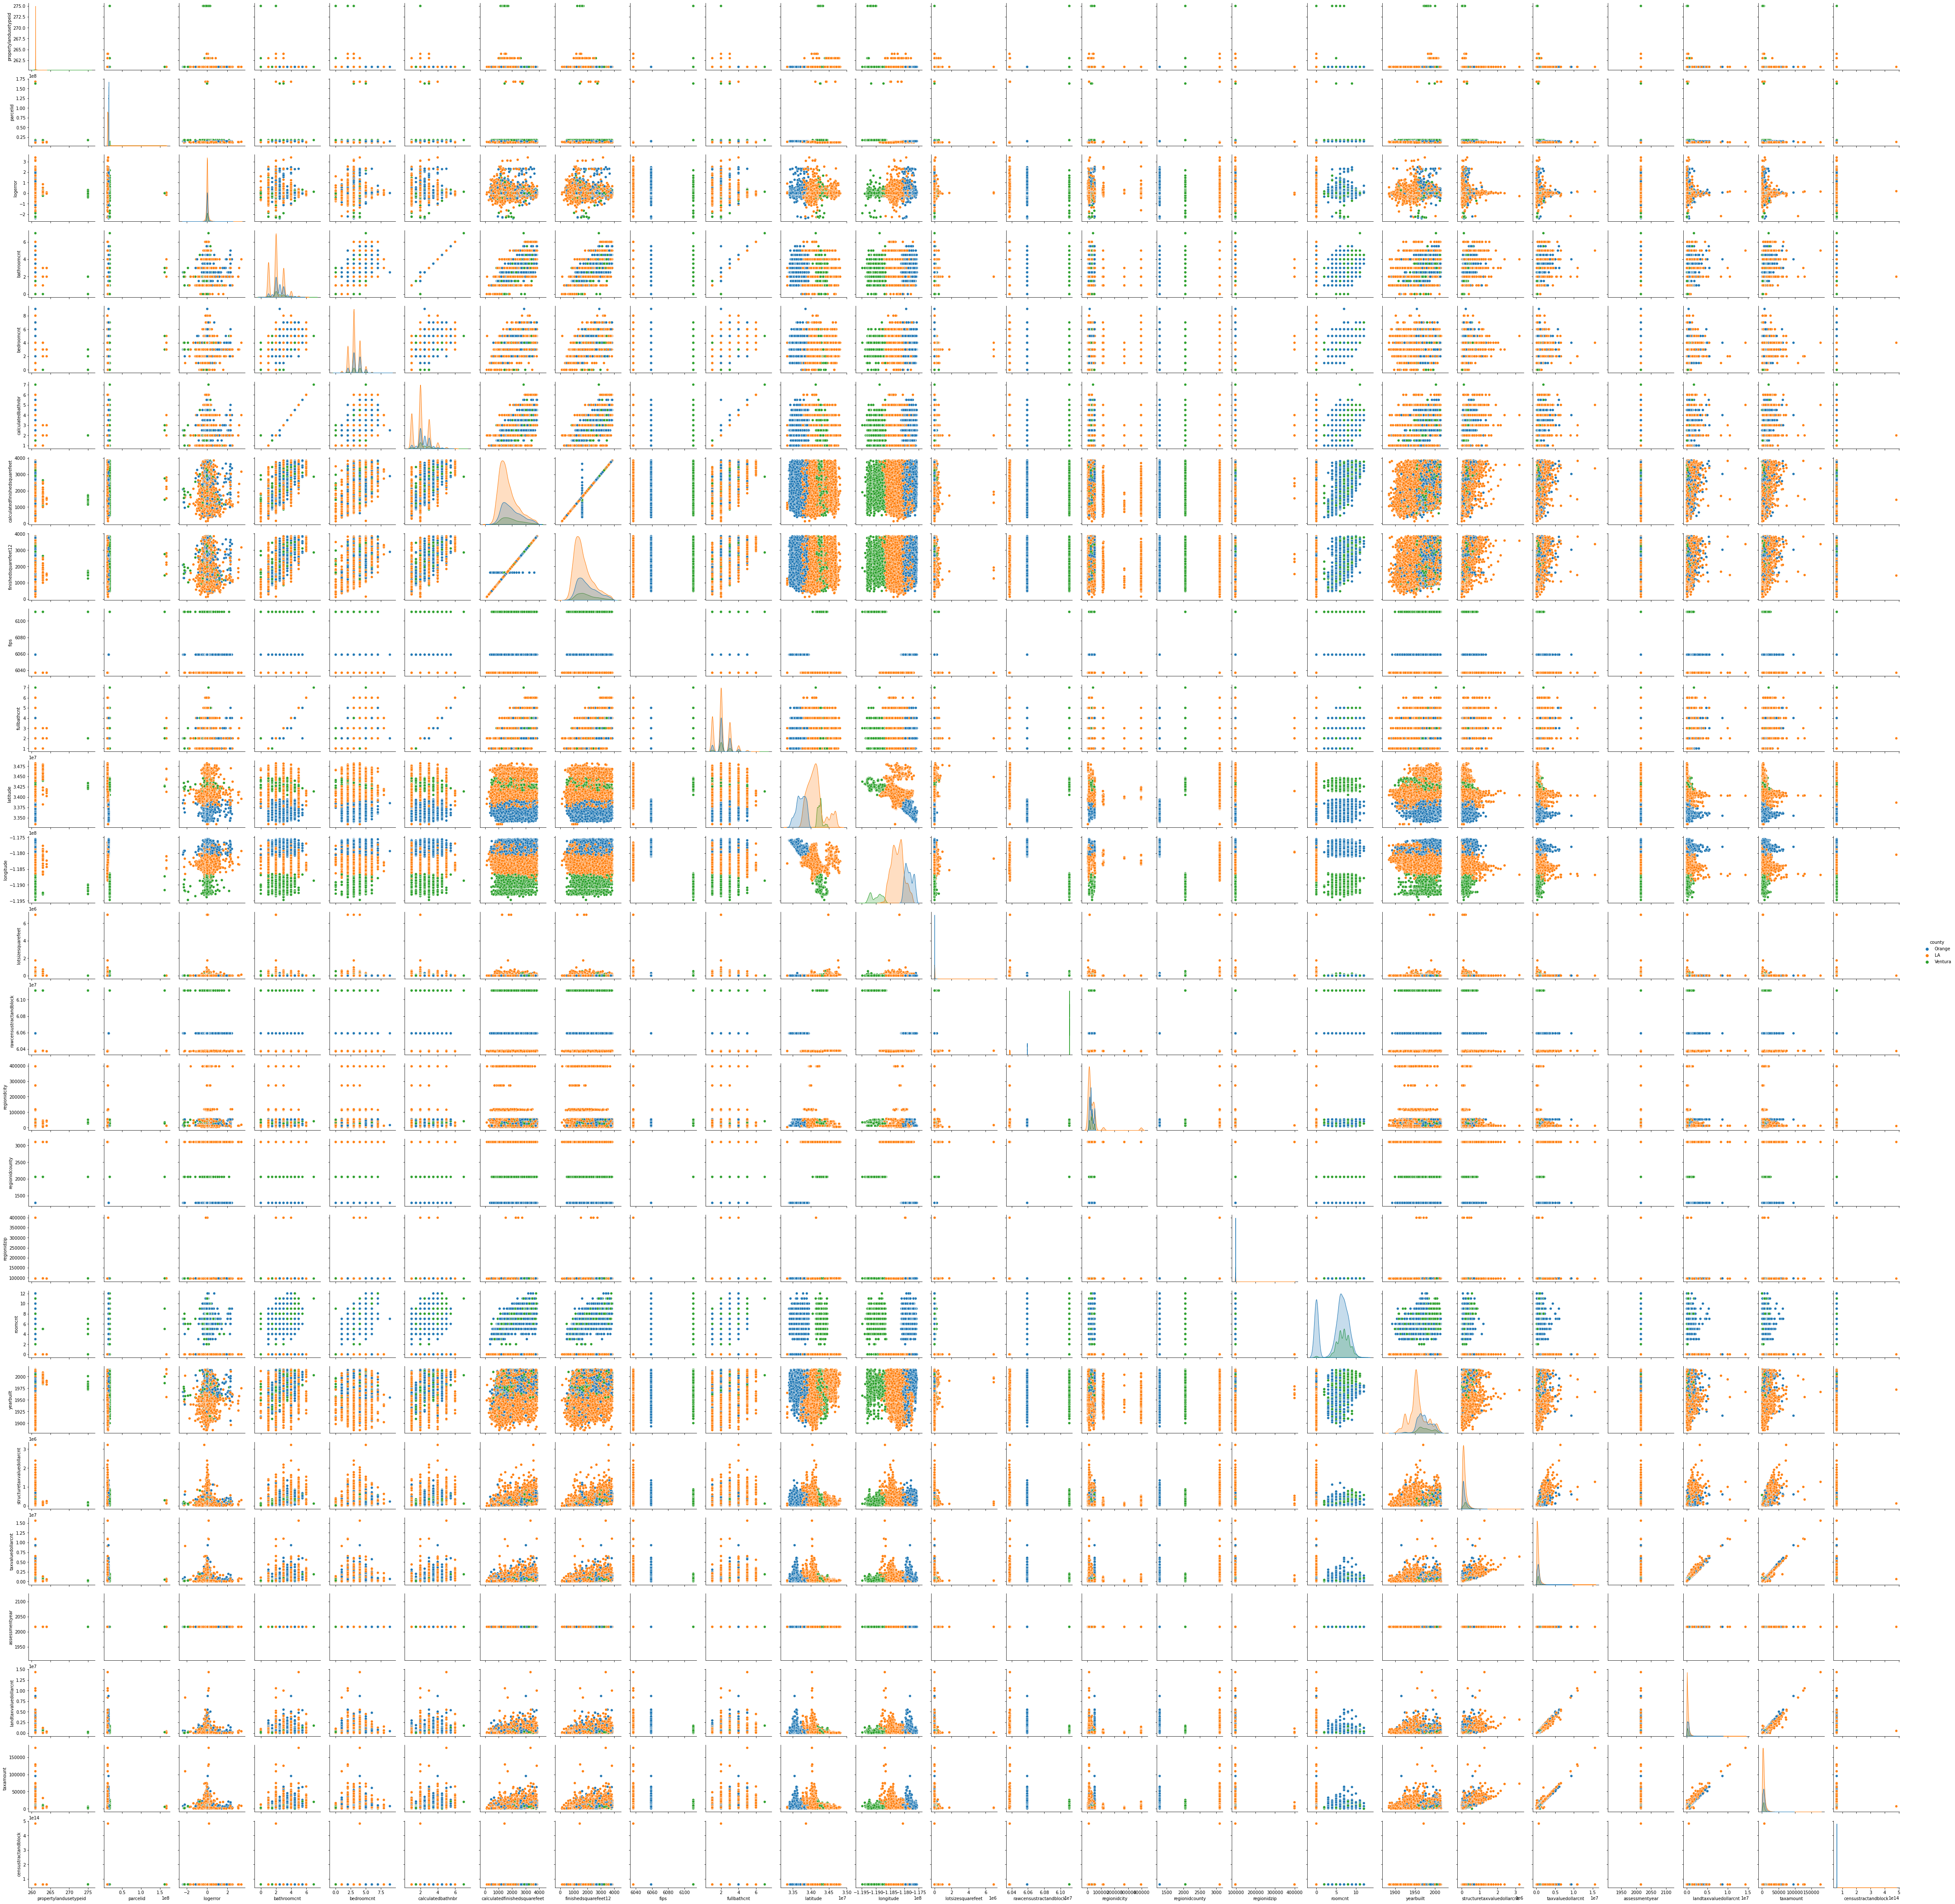

In [20]:
sns.pairplot(train, hue='county')